Train data shape: (404, 13)
Train label shape: (404,)
Iteration:  0  Loss:  21.614353  Accuracy:  0.00048828125
Iteration:  100  Loss:  15.81959  Accuracy:  0.07714844
Iteration:  200  Loss:  13.209713  Accuracy:  0.17626953
Iteration:  300  Loss:  12.77407  Accuracy:  0.2434082
Iteration:  400  Loss:  11.378523  Accuracy:  0.25756836
Iteration:  500  Loss:  9.92882  Accuracy:  0.3857422
Iteration:  600  Loss:  8.091883  Accuracy:  0.5197754
Iteration:  700  Loss:  8.147215  Accuracy:  0.4855957
Iteration:  800  Loss:  8.739446  Accuracy:  0.38452148
Iteration:  900  Loss:  8.761459  Accuracy:  0.38891602
Iteration:  1000  Loss:  7.9762874  Accuracy:  0.42797852
Iteration:  1100  Loss:  7.628457  Accuracy:  0.484375
Iteration:  1200  Loss:  8.316274  Accuracy:  0.52246094
Iteration:  1300  Loss:  6.820552  Accuracy:  0.5305176
Iteration:  1400  Loss:  9.981009  Accuracy:  0.39331055
Test loss:  7.5668993  Test accuracy:  0.5227051


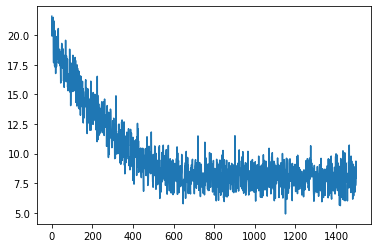

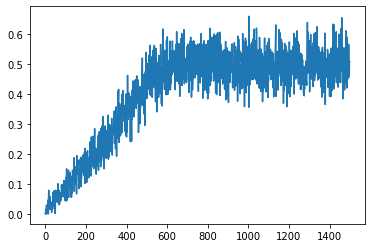

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%tensorflow_version 1.x

from keras.datasets import boston_housing
(train_data, train_label), (test_data, test_label) = boston_housing.load_data()

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)

input_size = train_data.shape[1]
output_size = 1

layers = [input_size, 512, 1024, 512, output_size]

losses = list()
accuracies = list()

num_iterations = 1500
batch_size = 64
learning_rate = 1e-4

tf.reset_default_graph()

input_data = tf.placeholder(tf.float32, [None, input_size])
expected_output = tf.placeholder(tf.float32, [None])

current_input = input_data

for i in range(len(layers)-1):
  with tf.variable_scope("fully" + str(i)):
    w = tf.get_variable('w', [layers[i], layers[i+1]])
    b = tf.get_variable('b', [layers[i+1]])
    current_input = tf.matmul(current_input, w)
    if (i != len(layers)-2):
      current_input = tf.layers.batch_normalization(current_input, training = True)
    else:
      current_input = tf.nn.dropout(current_input, rate = 0.1)
    current_input = tf.add(current_input, b)
    if (i != len(layers)-2):
      current_input = tf.nn.relu(current_input)

with tf.variable_scope("loss"):
  loss = tf.reduce_mean(tf.abs(tf.subtract(expected_output, current_input)))

with tf.variable_scope("optimizer"):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

with tf.variable_scope("accuracy"):
  good_enough = tf.less_equal(tf.abs(tf.subtract(expected_output, current_input)), 5) 
  accuracy = tf.reduce_mean(tf.cast(good_enough, tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(num_iterations):
    current_batch = random.sample(range(train_data.shape[0]), batch_size)
    batch_x = train_data[current_batch]
    batch_y = train_label[current_batch]
    _, l, a = sess.run([optimizer, loss, accuracy], feed_dict = {input_data : batch_x, expected_output : batch_y})
    losses.append(l)
    accuracies.append(a)
    if (i % 100 == 0):
      print("Iteration: ", i, " Loss: ", l, " Accuracy: ", a)
  
  current_batch = random.sample(range(test_data.shape[0]), batch_size)
  batch_x = test_data[current_batch]
  batch_y = test_label[current_batch]
  _, l, a = sess.run([optimizer, loss, accuracy], feed_dict = {input_data : batch_x, expected_output : batch_y})
  print("Test loss: ", l, " Test accuracy: ", a)


plt.figure(1)
plt.plot(losses)

plt.figure(2)
plt.plot(accuracies)